In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

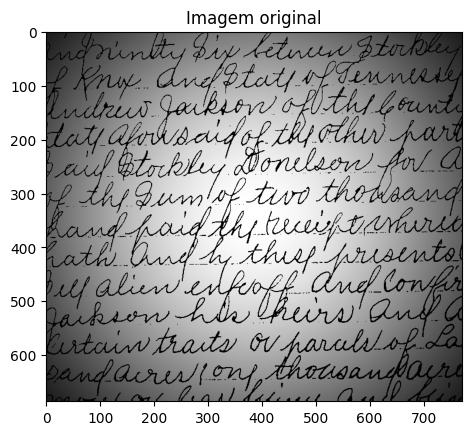

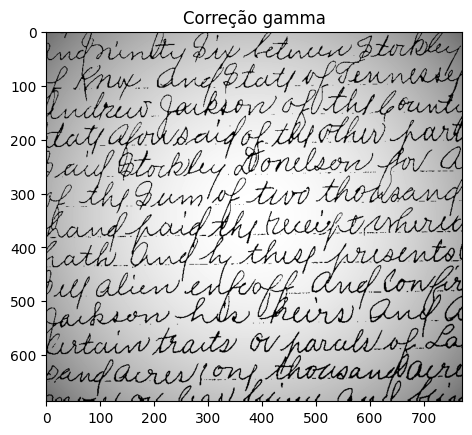

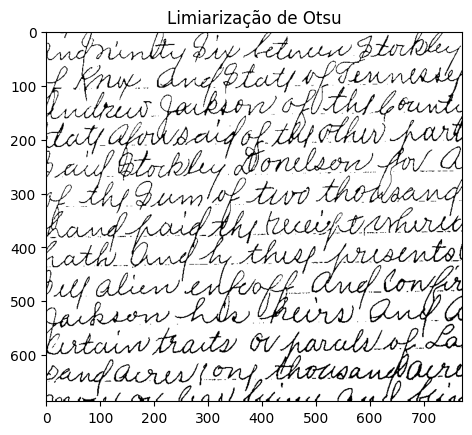

In [38]:
# Segmentação de imagens: limiarização otsu, detecção de descontinuidades (ponto, reta, borda), watershed, split/merge
# Segmentar o texto manuscrito da imagem 'shaded_text.tif' 
imfile = '../Imagens/shaded_text.tif'
img = cv2.imread(imfile, 0)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')
plt.show()

# Correção gamma
gamma = 0.37
img = np.power(img, gamma)
plt.imshow(img, cmap='gray')
plt.title('Correção gamma')
plt.show()


# Limiarização de Otsu
# Convert image to CV_8UC1 type
img = img.astype(np.uint8)

# Apply thresholding using Otsu's method
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(otsu, cmap='gray')
plt.title('Limiarização de Otsu')
plt.show()

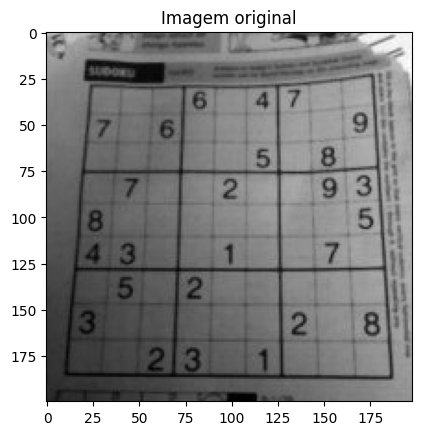

C:\Users\darly\AppData\Local\Temp\ipykernel_29092\1349303034.py:20: RuntimeWarning: invalid value encountered in divide
  div = np.float32(th)/(close)
C:\Users\darly\AppData\Local\Temp\ipykernel_29092\1349303034.py:21: RuntimeWarning: invalid value encountered in cast
  res = np.uint8(cv2.normalize(div, div, 0, 255, cv2.NORM_MINMAX))


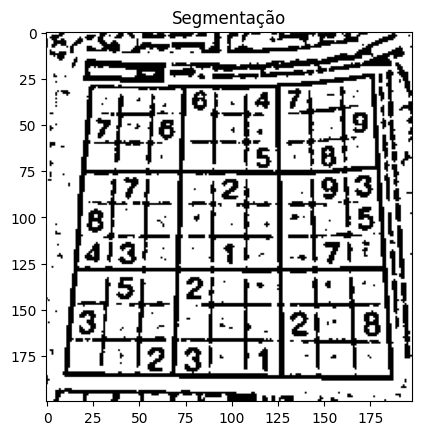

In [187]:
# Segmentar a imagem 'sudoku.png'
imfile = '../Imagens/sudoku.png'
img = cv2.imread(imfile)
plt.imshow(img)
plt.title('Imagem original')
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blurring
img = cv2.GaussianBlur(img, (3, 3), 0)

# Thresholding
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
close = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
div = np.float32(th)/(close)
res = np.uint8(cv2.normalize(div, div, 0, 255, cv2.NORM_MINMAX))
plt.imshow(res, cmap='gray')
plt.title('Segmentação')
plt.show()







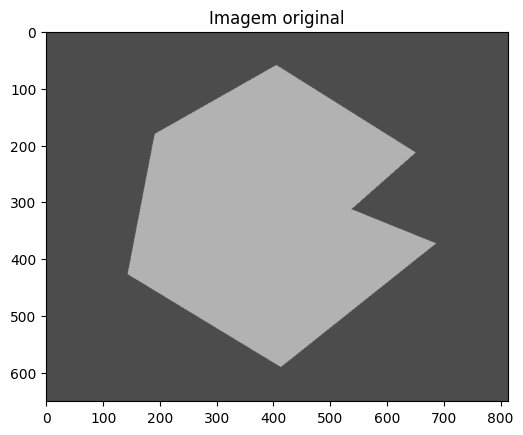

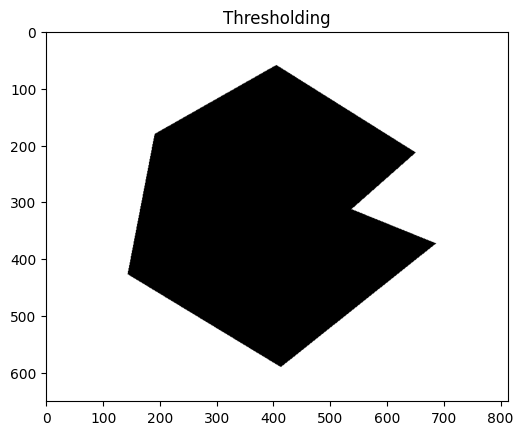

In [200]:
# Segmentar as imagens septagon.tif, septagon_noisy.tif e septagon_small_noisy.tif
imfile = '../Imagens/septagon.tif'
img = cv2.imread(imfile)
plt.imshow(img)
plt.title('Imagem original')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholding')
plt.show()




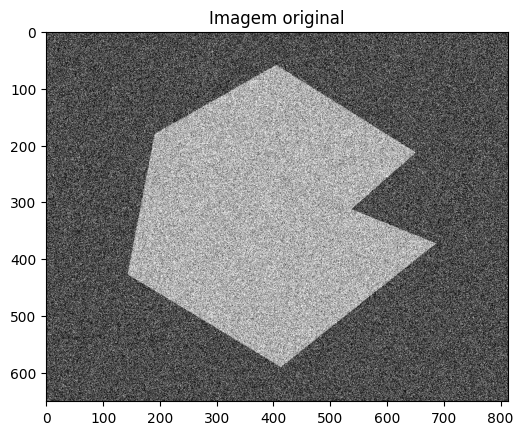

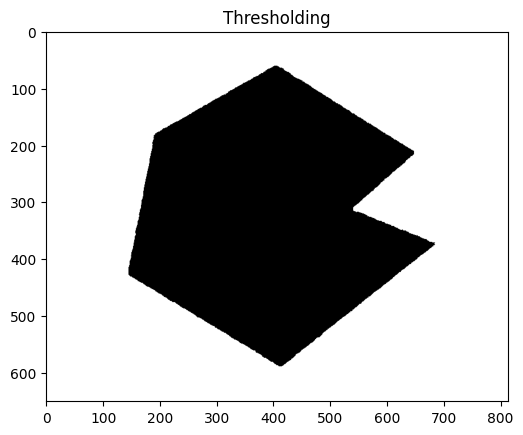

In [201]:
# Segmentando a imagem septagon_noisy.tif
imfile = '../Imagens/septagon_noisy.tif'
img = cv2.imread(imfile)
plt.imshow(img)
plt.title('Imagem original')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Removendo ruídos
median = cv2.medianBlur(gray, 7)  
ret, thresh = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholding')
plt.show()

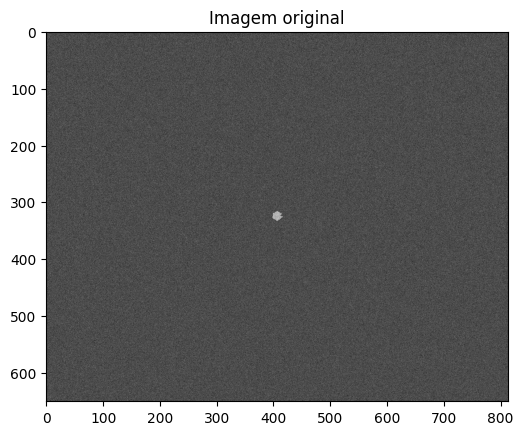

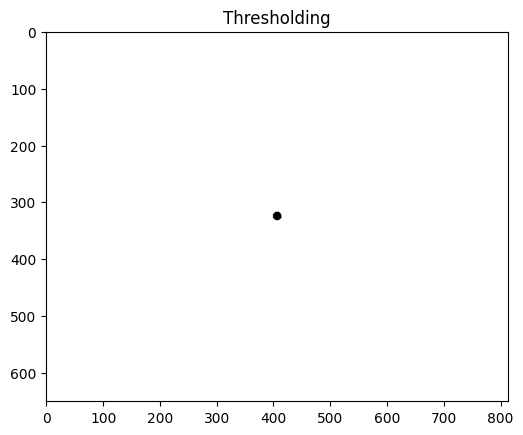

In [209]:
# Segmentando a imagem septagon_small_noisy.tif
imfile = '../Imagens/septagon_small_noisy.tif'
img = cv2.imread(imfile)
plt.imshow(img)
plt.title('Imagem original')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Removendo ruídos
median = cv2.medianBlur(gray, 7)
ret, thresh = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholding')
plt.show()


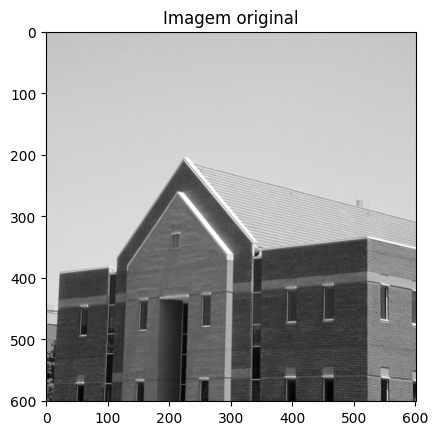

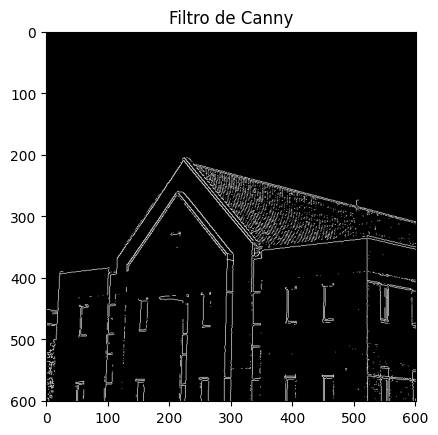

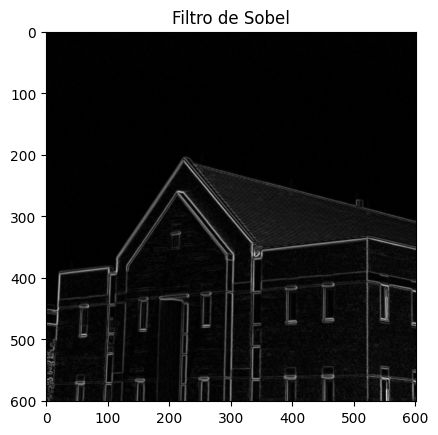

In [213]:
# Segmentando a imagem building.tif
imfile = '../Imagens/building.tif'
img = cv2.imread(imfile)
plt.imshow(img)
plt.title('Imagem original')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detectando bordas com o filtro de Canny
edges = cv2.Canny(gray, 200, 200)
plt.imshow(edges, cmap='gray')
plt.title('Filtro de Canny')
plt.show()

# Com filtro de sobel
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(sobel, cmap='gray')
plt.title('Filtro de Sobel')
plt.show()